In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import requests

# Question 1
## Regularization in Linear Regression
Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :
1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.
2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).
3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.
4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.

In [2]:
class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.lr=learning_rate
        self.epochs=epochs
        self.penalty=penalty
        self.alpha=alpha

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.reshape(-1,1)
        # init parameters
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        # gradient descent
        for i in range(self.epochs):
            delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            if (self.penalty=='L1'):
                dw= np.dot(X_train.T,delta)+self.alpha
                db= np.sum(delta).reshape(1,1)
                
            elif(self.penalty=='L2'):
                dw= np.dot(X_train.T,delta)+self.alpha*self.weights
                db= np.sum(delta).reshape(1,1)
                
            else:
                dw= np.dot(X_train.T,delta)
                db= np.sum(delta).reshape(1,1)

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted


# Question 2
# Linear Regression
Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (**linear regression, lasso and ridge regression**) and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (*We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.*)

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


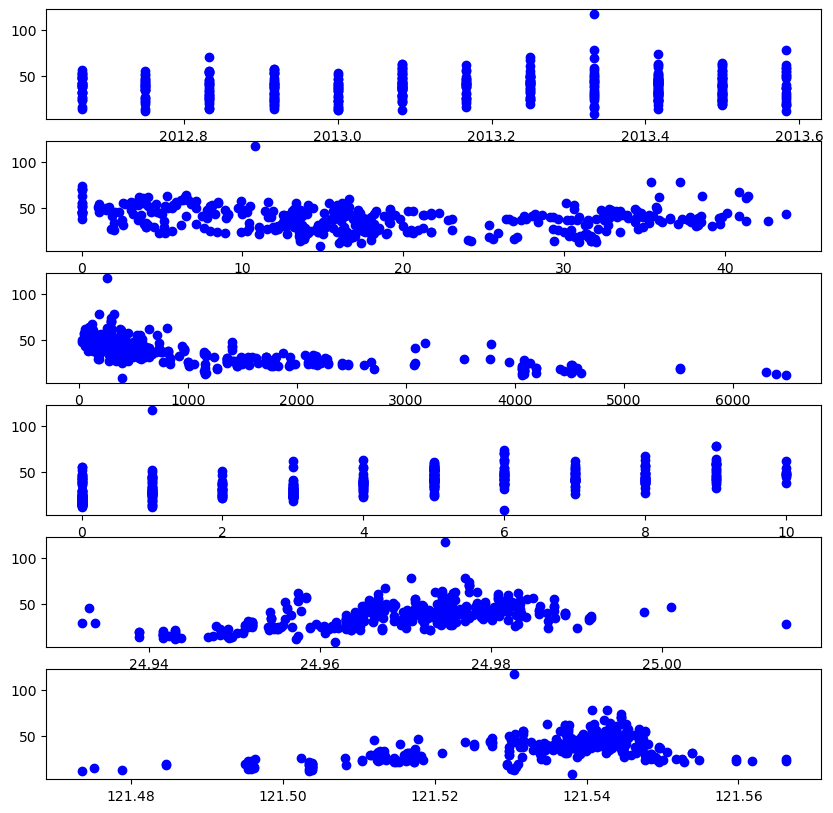

In [3]:
#Reading the csv file downloaded on desktop
df = pd.read_csv(r"C:\Users\shash\OneDrive\Desktop\Real estate.csv")

#checking for null values
df.info()
#no null values found
col = df.columns.values
col = col.tolist()
col.pop(0)

fig2,ax= plt.subplots(6,1,figsize=(10,10))
for i in range(6):
    plt.subplot(611+i)
    plt.scatter(df[col[i]],df['Y house price of unit area'], color='blue')
    
#Columns Transaction date, Latitude and Longitude can be removed
drop_col = ['No','X1 transaction date','X5 latitude','X6 longitude']
df.drop(drop_col, inplace = True, axis=1)


In [4]:
df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1
...,...,...,...,...
409,13.7,4082.01500,0,15.4
410,5.6,90.45606,9,50.0
411,18.8,390.96960,7,40.6
412,8.1,104.81010,5,52.5


In [5]:
X = np.array(df[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']])
y = np.array(df[['Y house price of unit area']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
print(X_train.shape)

(310, 3)


In [7]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

X_train = minmax.fit_transform(X_train)
X_test = minmax.fit_transform(X_test)

print(X_train.shape)

(310, 3)


In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [9]:
#training the model for linear regression
mod_lr = LinearRegression(learning_rate=0.01,epochs=3500, penalty=None, alpha=0)
Train_lr = mod_lr.fit(X_train, y_train)
y_predict = mod_lr.predict(X_test)

[[ -8.54377545]
 [-18.46982342]
 [ 21.25291792]] [[36.29483445]]


In [10]:
#Checking the error
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print("Mean Squared error is:",mse)
print("R square is:",r2)

Mean Squared error is: 78.62170336624955
R square is: 0.5043349350355977


In [11]:
#training model with Linear regression including lasso regression
mod_L1 = LinearRegression(learning_rate=0.01,epochs=3500, penalty='L1', alpha=0.5)
Train_L1 = mod_L1.fit(X_train, y_train)
y_predict_L1 = mod_L1.predict(X_test)

[[-13.68459417]
 [-31.01094734]
 [ 13.07967274]] [[43.66139201]]


In [12]:
#checking for error
mse = mean_squared_error(y_test,y_predict_L1)
r2 = r2_score(y_test,y_predict_L1)
print("Mean Squared Error is:",mse)
print("R square is:",r2)

Mean Squared Error is: 72.178341106303
R square is: 0.5449566646143617


In [13]:
#Training model with Linear Regression including Ridge regression
mod_L2 = LinearRegression(learning_rate=0.01,epochs=3500, penalty='L2', alpha=0.5)
Train_L2 = mod_L2.fit(X_train, y_train)
y_predict_L2 = mod_L2.predict(X_test)

[[-1.42937208]
 [-3.11962236]
 [ 3.80019183]] [[38.27018276]]


In [14]:
#checking error
mse = mean_squared_error(y_test,y_predict_L2)
r2 = r2_score(y_test,y_predict_L2)
print("Mean Squared Error is:",mse)
print("R square is:",r2)

Mean Squared Error is: 141.2639907586095
R square is: 0.1094109875701994


In [15]:
#Training LR model from sklearn library
from sklearn import linear_model
LR_mod = linear_model.LinearRegression()
LR_mod.fit(X_train, y_train)
y_pred_LR = LR_mod.predict(X_test)

In [16]:
#checking for error
mse = mean_squared_error(y_test,y_pred_LR)
r2 = r2_score(y_test,y_pred_LR)
print("Mean Squared Error is:",mse)
print("R square is:",r2)

Mean Squared Error is: 72.86709039294053
R square is: 0.5406144926022004


In [17]:
#Training LR model including Lasso from sklearrn library
LR_mod_lasso = linear_model.Lasso()
LR_mod_lasso.fit(X_train,y_train)
y_pred_lasso = LR_mod_lasso.predict(X_test)

In [18]:
#checking for error
mse = mean_squared_error(y_test,y_pred_lasso)
r2 = r2_score(y_test,y_pred_lasso)
print("Mean Squared Error is:",mse)
print("R square is:",r2)

Mean Squared Error is: 104.293209818901
R square is: 0.3424907066765124


In [19]:
#Training LR model including ridge from sklearn library
LR_mod_ridge = linear_model.Ridge()
LR_mod_ridge.fit(X_train,y_train)
y_pred_ridge = LR_mod_ridge.predict(X_test)

In [20]:
#checking for error
mse = mean_squared_error(y_test,y_pred_lasso)
r2 = r2_score(y_test,y_pred_lasso)
print("Mean Squared Error is:",mse)
print("R square is:",r2)

Mean Squared Error is: 104.293209818901
R square is: 0.3424907066765124


# Question 3
## Logistic Regression
The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

bc_data = load_breast_cancer(as_frame = True)
X = np.array(bc_data.data)
y = np.array(bc_data.target)

minmax = MinMaxScaler()
X = minmax.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

5. Write code for the sigmoid function and Logistic regression.
(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

*Optional* : Include the regularization terms as you did in the first question. 

In [22]:
def sigmoid(z):
    fxn = 1.0/(1.0 + np.exp(-z))
    return fxn

def sigmoid_derivative(z):
    der = np.exp(-z)*(sigmoid(z)**2)
    return der

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape 
        y = y.reshape(-1, 1)
        self.weights = np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias = np.random.randn(1,1)

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = -np.dot(X.T,(y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples

            self.weights -= self.lr* dw
            self.bias -= self.lr* db

    def predict(self, X):
      #Write the predict function
        y_pred = np.dot(X,self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1 
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [23]:
#My model
mod_logr = LogisticRegression(learning_rate=0.01, epochs=3500)
mod_logr.fit(X_train, y_train)
y_predict = mod_logr.predict(X_test)

mod_logr_mse = mean_squared_error(y_predict,y_test)
mod_logr_r2 = r2_score(y_predict,y_test)
print("Mean Squared Error: ",mod_logr_mse)
print("R2 score: ",mod_logr_r2)
print("Accuracy-Score: ",accuracy_score(y_test,y_predict))

Mean Squared Error:  0.06293706293706294
R2 score:  0.7446428571428572
Accuracy-Score:  0.9370629370629371


In [24]:
#Sklearn Model
skmod_logr = linear_model.LogisticRegression(penalty=None)
skmod_logr.fit(X_train,y_train)
sk_y_predict = skmod_logr.predict(X_test)

skmod_logr_mse = mean_squared_error(sk_y_predict,y_test)
skmod_logr_r2 = r2_score(sk_y_predict,y_test)
print("Mean Squared Error: ",skmod_logr_mse)
print("R2 score: ",skmod_logr_r2)
print("Accuracy-Score: ",accuracy_score(y_test,sk_y_predict))

Mean Squared Error:  0.06993006993006994
R2 score:  0.7128514056224899
Accuracy-Score:  0.9300699300699301


In [25]:
#Sklearn Model with Lasso Regression

skmod_logr_lasso = linear_model.LogisticRegression(solver='saga',penalty='l1')
skmod_logr_lasso.fit(X_train,y_train)
sk_yl_predict = skmod_logr_lasso.predict(X_test)

skmod_logr_mse_l = mean_squared_error(sk_yl_predict,y_test)
skmod_logr_r2_l = r2_score(sk_yl_predict,y_test)
print("Mean Squared Error: ",skmod_logr_mse_l)
print("R2 score: ",skmod_logr_r2_l)
print("Accuracy-Score: ",accuracy_score(y_test,sk_yl_predict))

Mean Squared Error:  0.027972027972027972
R2 score:  0.8809821057012068
Accuracy-Score:  0.972027972027972


C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
#Sklearn Model with Ridge Regression

skmod_logr_ridge = linear_model.LogisticRegression(solver='saga',penalty='l2')
skmod_logr_ridge.fit(X_train,y_train)
sk_yr_predict = skmod_logr_ridge.predict(X_test)

skmod_logr_mse_r = mean_squared_error(sk_yr_predict,y_test)
skmod_logr_r2_r = r2_score(sk_yr_predict,y_test)
print("Mean Squared Error: ",skmod_logr_mse_r)
print("R2 score: ",skmod_logr_r2_r)
print("Accuracy-Score: ",accuracy_score(y_test,sk_yr_predict))

Mean Squared Error:  0.013986013986013986
R2 score:  0.9395604395604396
Accuracy-Score:  0.986013986013986


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .
11. **Optional Challenge** : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.

In [27]:
#The above error stats tells that scikit-learn model with ridge regression is best
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, sk_yr_predict, target_names=['malignant','benign']))
print(confusion_matrix(y_test,sk_yr_predict))

              precision    recall  f1-score   support

   malignant       1.00      0.96      0.98        54
      benign       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

[[52  2]
 [ 0 89]]


# Question 4
## KNN and Decision Tree
How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass". 

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [75]:
#Reading the dataset from my desktop

df = pd.read_csv(r"C:\Users\shash\OneDrive\Desktop\glass.csv")
df.columns.values

#Extracting X and y
X = df.drop('Type',axis=1)
y = df['Type']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [77]:
from collections import Counter

#Euclidean Distance function
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

#KNN model
class KNN(object):
    def __init__(self,k):
        self.k=k
        
    def fit(self,X_train,y_train):
        self.X_train=X_train
        self.y_train=y_train
    def predict(self,X_test):
        y_pred=[]
        for x in X_test:
            distance = [euclidean_distance(x,x1) for x1 in self.X_train]
            k_shortest_indices = np.argsort(distance)[:self.k]
            k_labels = [self.y_train[i] for i in k_shortest_indices]
            common_label = np.bincount(k_labels)
            y_pred.append(np.argmax(common_label))
        return np.array(y_pred)
    
def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

#Fitting the model on the training data
clf = KNN(k=3)
clf.fit(X_train,y_train)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [79]:
y_predict = clf.predict(X_test)
print(accuracy(y_predict,y_test))

0.7037037037037037


In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric=euclidean_distance)
knn.fit(X_train, y_train)
y_predict_sk = knn.predict(X_test)
print(accuracy(y_predict_sk,y_test))

0.7037037037037037


9. Finally use sklearn.tree to implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
10. Plot the decision tree.

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
#Prediction when max depth = 5
dct = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=5)
dct.fit(X_train,y_train)
y_predict_1 = dct.predict(X_test)
print(accuracy(y_predict_1,y_test))

0.6851851851851852


In [83]:
#Prediction when max depth = 6
dct1= DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=6)
dct1.fit(X_train,y_train)
y_predict_2 = dct1.predict(X_test)
print(accuracy(y_predict_2,y_test))

0.7222222222222222


In [84]:
#Prediction when max depth = 7
dct2= DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=7)
dct2.fit(X_train,y_train)
y_predict_3 = dct2.predict(X_test)
print(accuracy(y_predict_3,y_test))

0.7037037037037037


In [85]:
#Prediction when max depth = 8
dct3= DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=8)
dct3.fit(X_train,y_train)
y_predict_4 = dct3.predict(X_test)
print(accuracy(y_predict_4,y_test))

0.7037037037037037


In [86]:
#Prediction when max depth = 9
dct4= DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=9)
dct4.fit(X_train,y_train)
y_predict_5 = dct4.predict(X_test)
print(accuracy(y_predict_5,y_test))

0.7037037037037037


In [87]:
#Prediction when max depth = 10
dct5= DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=10)
dct5.fit(X_train,y_train)
y_predict_6 = dct5.predict(X_test)
print(accuracy(y_predict_6,y_test))

0.7037037037037037


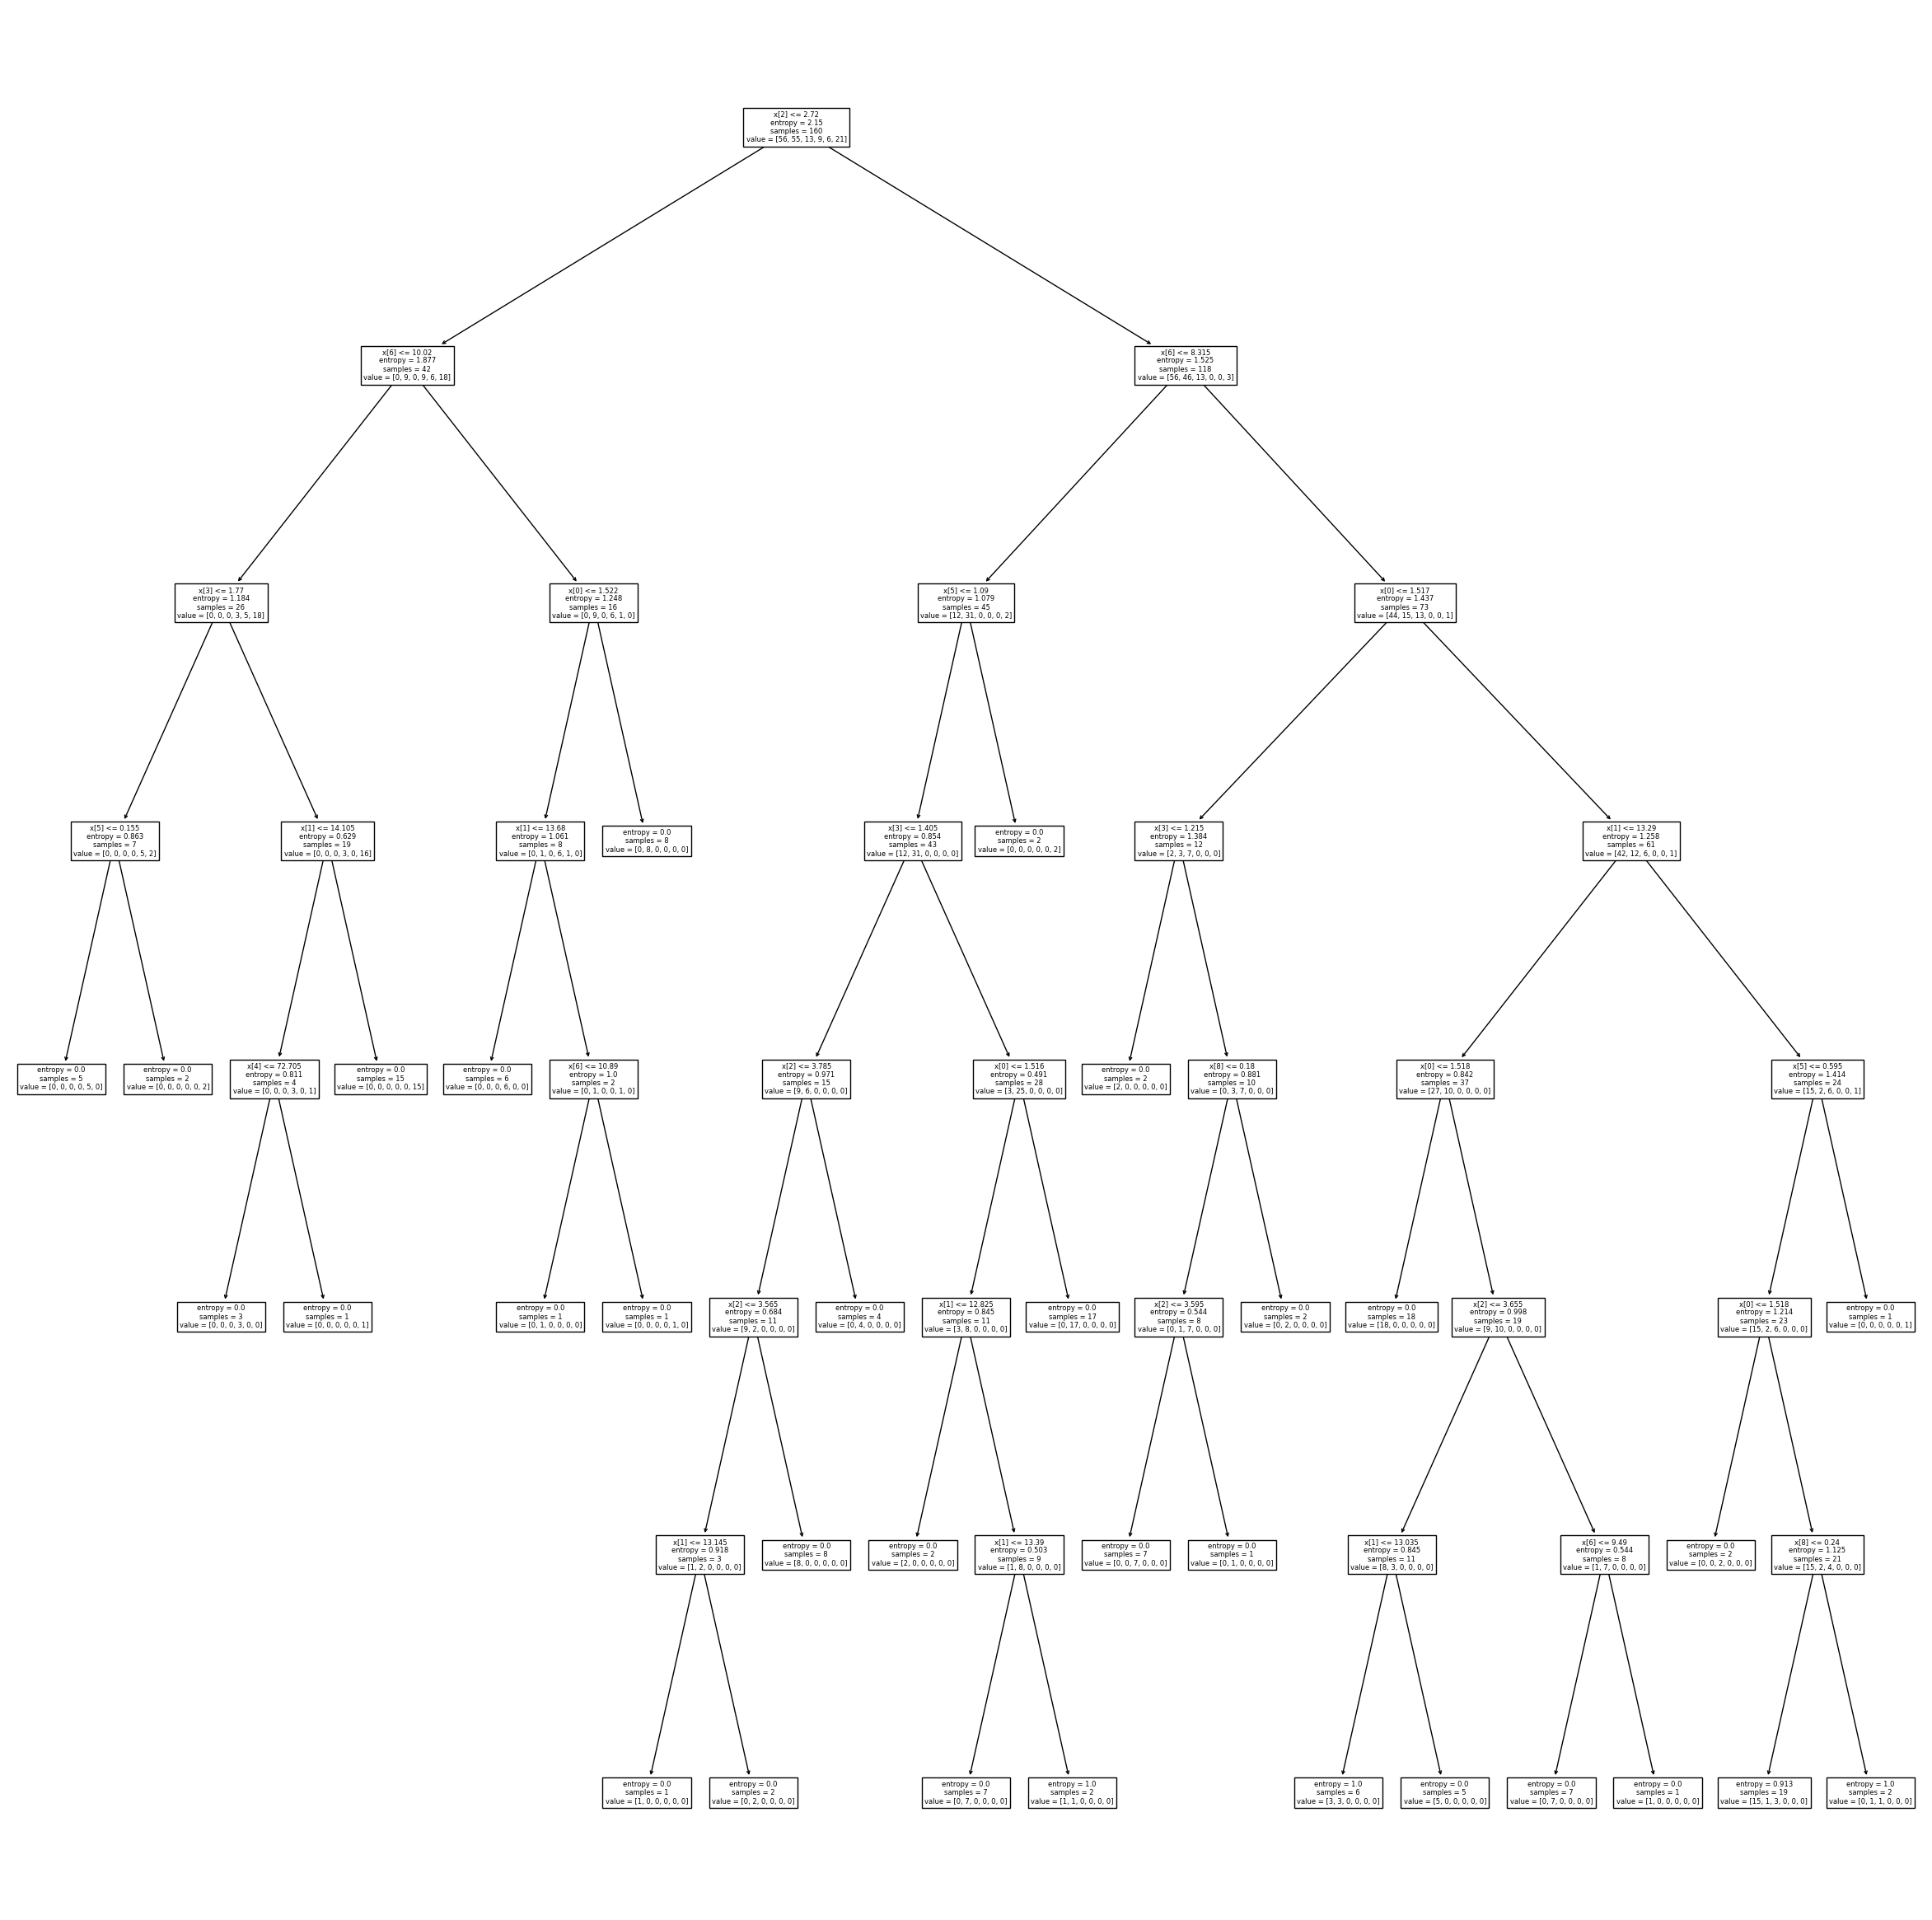

In [93]:
#Plotting the decision tree
plt.figure(figsize = (30,30))
plot_tree(decision_tree=dct2,max_depth=7)
plt.savefig("dtree.png")
plt.show()